# Linear Regression

Now we will implement two ways to do linear regression. We will generate some data (area and age) for houses, and try to predict their price.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(42)
N = 50
house_area = np.random.uniform(50,300,size=N)
house_age = np.random.uniform(0,150,size=N)
noise = np.random.normal(10, 5,size=N)
house_price = 1.1 * house_area - 0.5 * house_age + noise # the price is assumed to be in k€

In [3]:
training_data = np.concatenate([house_age.reshape(-1,1), house_area.reshape(-1,1)], axis=1)

Let's visualize the relation between the target and each individual variable.

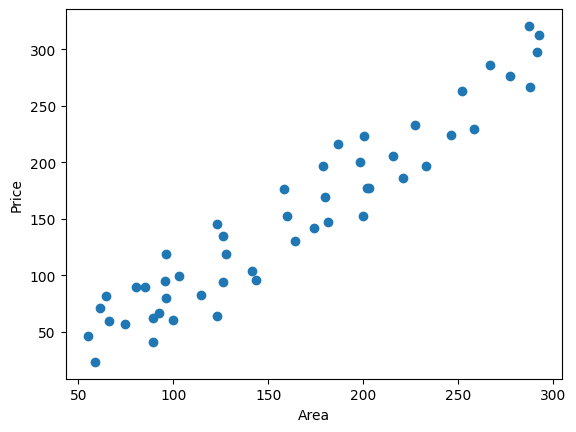

In [4]:
plt.scatter(house_area, house_price)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

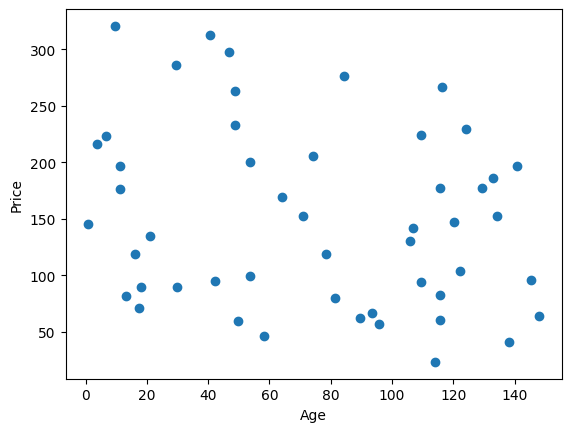

In [5]:
plt.scatter(house_age, house_price)
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

Now let's do a linear regression! We will assume there is no intercept, i.e. $f(\mathbf{x}) = \mathbf{w}^\top\mathbf{x}$ (there is no additional $w_0$ term)

Given the parameters $\mathbf{w} = (w_1,w_2)^\top$ and the training data $\mathbf{X}$,
predictions can be made with $\hat{\mathbf{y}} = \mathbf{Xw}$

In [5]:
w = np.array([2,2]) # as a start
X = training_data

In [10]:
predictions = X.dot(w)

**Plot the fitted curve for each of the two parameters in the fitted $\mathbf{w}$.**

Example with the first parameter:

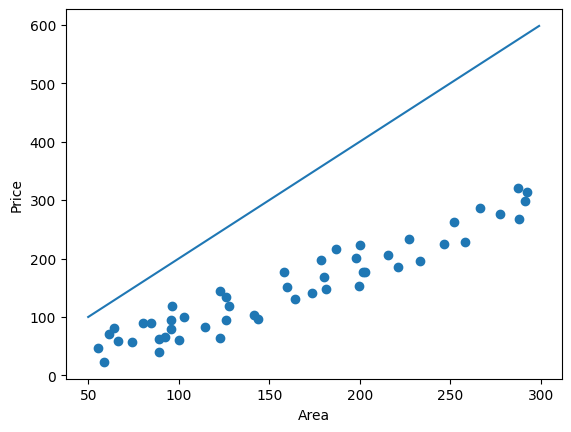

In [7]:
plt.scatter(house_area, house_price)
plt.xlabel('Area')
plt.ylabel('Price')

area_range = np.arange(50,300,1)
predictions = w[0] * area_range
plt.plot(area_range, predictions)

plt.show()

For now, it's not looking good because we haven't trained the model. It should look better after your gradient descent.

**Implement a function which provides the mean square error
$J(\mathbf{w}) = \frac{1}{N}  \lVert \mathbf{y} - \mathbf{Xw} \rVert_2^2$
given the training data, labels and model parameters.**

In [8]:
def loss_function(y_ground_truth, y_pred):
    error = (y_ground_truth - y_pred)
    return error.dot(error.T)/error.shape[0]

**What is $\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}}$?**

In [11]:
y_pred = predictions
y_target = house_price
loss_function(y_target, y_pred)

121198.20360919276

**Implement gradient descent:
$\mathbf{w}_{(t)} = \mathbf{w}_{(t-1)} - \alpha \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}}$**

**Determine suitable values for the parameters $\mathbf{w}$ using gradient descent on the training set.**

**Print the training error at each step. Is the training error decreasing? If not, try different values of $\alpha$.**

In [12]:
a = 1e-7
for i in range(100):
    w = w - a*(X.T@X@w - X.T@house_price)
print(w)

[0.07414153 0.90654025]


The training error should be much lower than at the start.

**Now plot again the fitted curve for each of the two parameters in the fitted $\mathbf{w}$.**

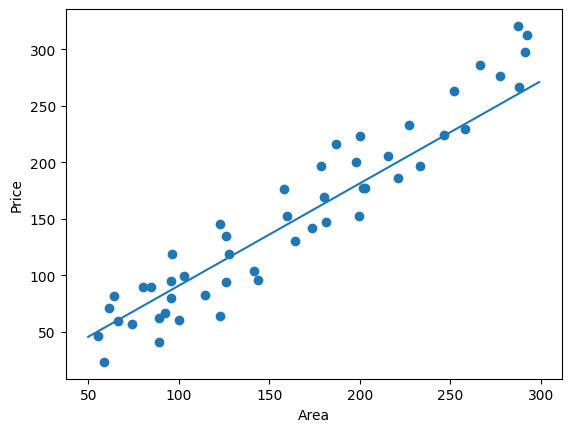

In [14]:
plt.scatter(house_area, house_price)
plt.xlabel('Area')
plt.ylabel('Price')

area_range = np.arange(50,300,1)
predictions = w[1] * area_range
plt.plot(area_range, predictions)

plt.show()

**Now use the closed-form solution to obtain good values for the parameters $\mathbf{w}$ using the training set.**

**Display the exact values of the parameters $\mathbf{w}$.
Are they the same as the one you obtained from gradient descent?
Are they the same as the ground truth values? Why?**

In practice, a machine learning engineer does not waste time implementing standard algorithms.
Scikit-learn provides an implementation of a linear regression, among many other learning algorithms.

*(Obviously, YOU are not wasting time, because you are learning. Implementing a linear regression is something everyone should do at least once in their life).*

**Look at the documentation from scikit-learn, and train a linear regression on our data using the provided implementation.
Look at the coefficients $\mathbf{w}$. Is it the same as the one you found? Is it the same as the ground truth?**

# Non-linear case

Let's load a different dataset to do linear regression

In [13]:
with open('Lab 1 Non-linear regression data.npy', 'rb') as file:
    X = np.load(file)
    Y = np.load(file)
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (100,)
Shape of Y: (100,)


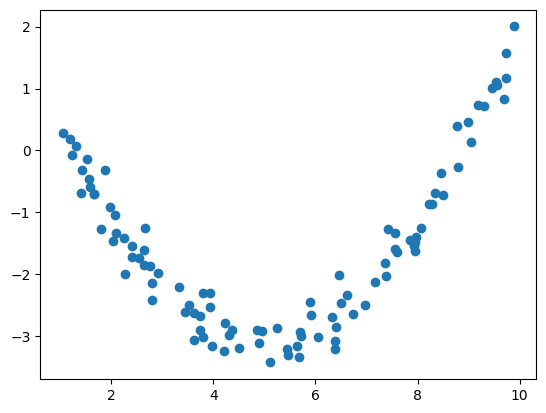

In [14]:
plt.scatter(X, Y)
plt.show()

The data should not look linear. Yet we still do a linear regression. 
You should find some thing related to these numbers 0.2, -2, 2.

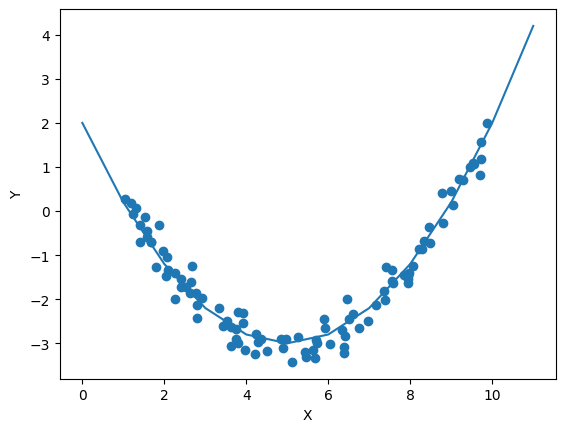

In [42]:
w_non = np.array([2, -2, 0.2])
u = X**2
one_s = np.ones((X.shape[0],1))
ubar = np.concatenate((one_s,X), axis = 1)
training_data_non = np.concatenate((ubar, u), axis = 1)
U = training_data_non
y_non_pred = training_data_non @ w_non.T 
arange_non = np.arange(0,12,1)
arange_non_2 = arange_non**2
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
predictions_non = w_non[2]*arange_non_2 +w_non[1]*arange_non + w_non[0]
plt.plot(arange_non, predictions_non)
plt.show()


In [43]:
a = -(1e-7)
for i in range(100):
    w_non = w_non - a*(U.T@U@w_non - U.T@Y)

print(w_non)

[ 2.00003406 -1.99963887  0.20286952]


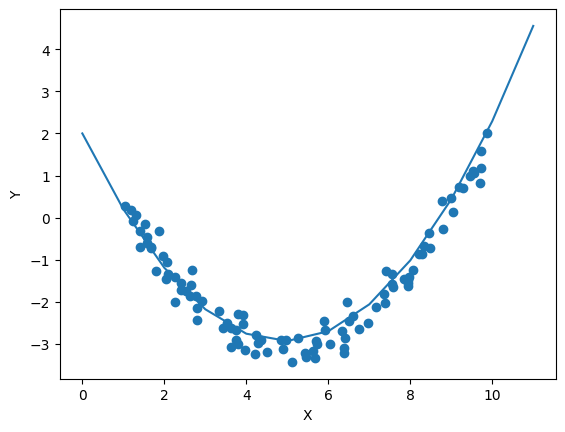

In [44]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
predictions_non = w_non[2]*arange_non_2 +w_non[1]*arange_non + w_non[0]
plt.plot(arange_non, predictions_non)
plt.show()